<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Agro.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ";", low_memory=False)
df

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5.932,854,537,13.692,111.190,252.0,38.0,38.0,...,NaN,"25.511.889,220","18.911.068,400","1.665.392,540",80.0,0.0,"32,065",SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27.505,5.680,4.778,104.977,554.663,671.0,3.0,3.0,...,"1.777.256,000","63.002.672,933","45.304.154,440","538.882,600",299.0,3.0,"55,065",MG,Elói Mendes,Sudeste
2,2016,3552007,6.193,668,580,12.519,62.441,83.0,0.0,0.0,...,NaN,"30.492.825,449","21.861.157,950","1.048.458,040",59.0,2.0,"14,930",SP,Silveiras,Sudeste
3,2016,3305604,21.279,3.087,2.669,80.161,403.121,290.0,0.0,0.0,...,NaN,"140.538.926,872","100.508.822,360","871.234,340",272.0,2.0,"22,698",RJ,Silva Jardim,Sudeste
4,2016,1717008,4.534,212,183,5.309,48.551,34.0,94.0,34.0,...,NaN,"15.541.375,953","13.178.989,760","8.037,870",43.0,1.0,"2,908",TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7.171,463,436,10.502,NaN,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,135.0,3.0,"83,287",AL,Monteirópolis,Nordeste
33416,2021,1600105,9.265,428,383,9.932,NaN,38.0,0.0,0.0,...,NaN,NaN,NaN,NaN,160.0,2.0,"1,010",AP,Amapá,Norte
33417,2019,2605459,3.061,2.210,1.773,43.093,192.775,289.0,0.0,0.0,...,NaN,NaN,NaN,NaN,32.0,1.0,"180,059",PE,Fernando de Noronha,Nordeste
33418,2020,1503002,7.070,538,514,12.207,63.579,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,149.0,4.0,"0,601",PA,Faro,Norte


In [17]:
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que é string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
df

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que é string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

df

C:\Users\Renan\AppData\Local\Temp\ipykernel_8672\1254699193.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData\Local\Temp\ipykernel_8672\1254699193.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData\Local\Temp\ipykernel_8672\1254699193.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,380,380,...,0,25511889.220,18911068.400,1665392.540,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,30,30,...,1777256.000,63002672.933,45304154.440,538882.600,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,00,00,...,0,30492825.449,21861157.950,1048458.040,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,00,00,...,0,140538926.872,100508822.360,871234.340,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,940,340,...,0,15541375.953,13178989.760,8037.870,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,00,00,...,0,0,0,0,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,00,00,...,0,0,0,0,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,00,00,...,0,0,0,0,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,00,00,...,0,0,0,0,1490,40,0.601,PA,Faro,Norte


In [9]:
df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)



5. Existe uma correlação entre a área plantada e a área colhida?

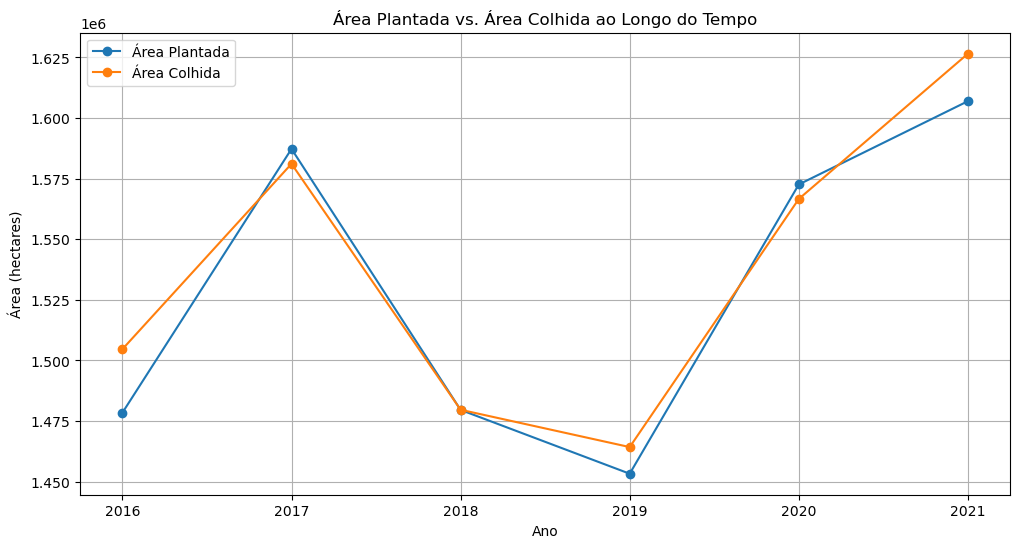

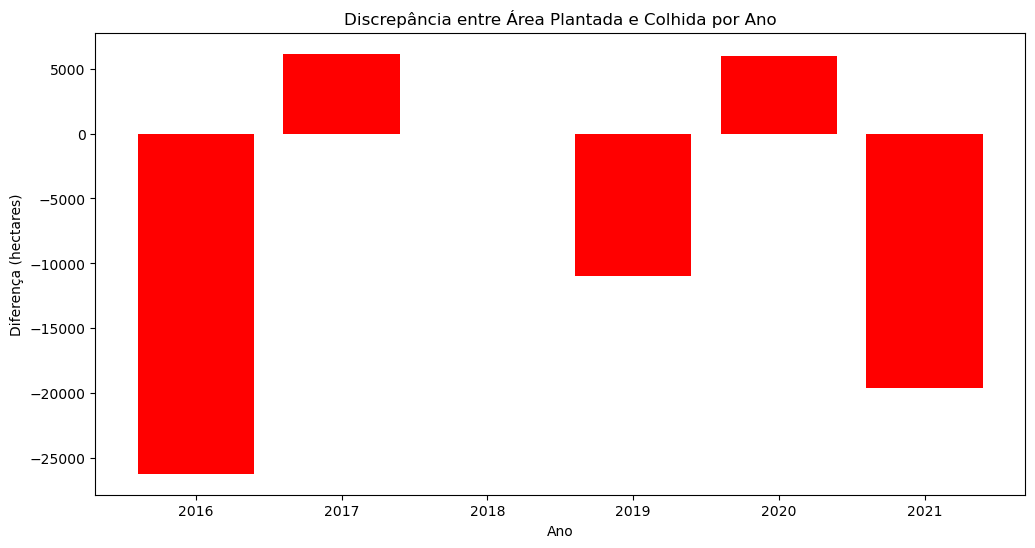

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados agrupados por ano
df_grouped = df.groupby('Ano')[['AreaPlantada_h', 'AreaColhida_h']].sum().reset_index()

# Gráfico de linhas comparativo
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Ano'], df_grouped['AreaPlantada_h'], marker='o', label='Área Plantada')
plt.plot(df_grouped['Ano'], df_grouped['AreaColhida_h'], marker='o', label='Área Colhida')
plt.xlabel('Ano')
plt.ylabel('Área (hectares)')
plt.title('Área Plantada vs. Área Colhida ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

# Discrepância anual
df_grouped['Discrepância'] = df_grouped['AreaPlantada_h'] - df_grouped['AreaColhida_h']
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['Ano'], df_grouped['Discrepância'], color='red')
plt.xlabel('Ano')
plt.ylabel('Diferença (hectares)')
plt.title('Discrepância entre Área Plantada e Colhida por Ano')
plt.show()

Uma discrepância crescente pode indicar perdas por fatores climáticos, pragas ou mudanças no uso do solo.

6. Municípios mais densamente povoados tendem a ter menor área agrícola?

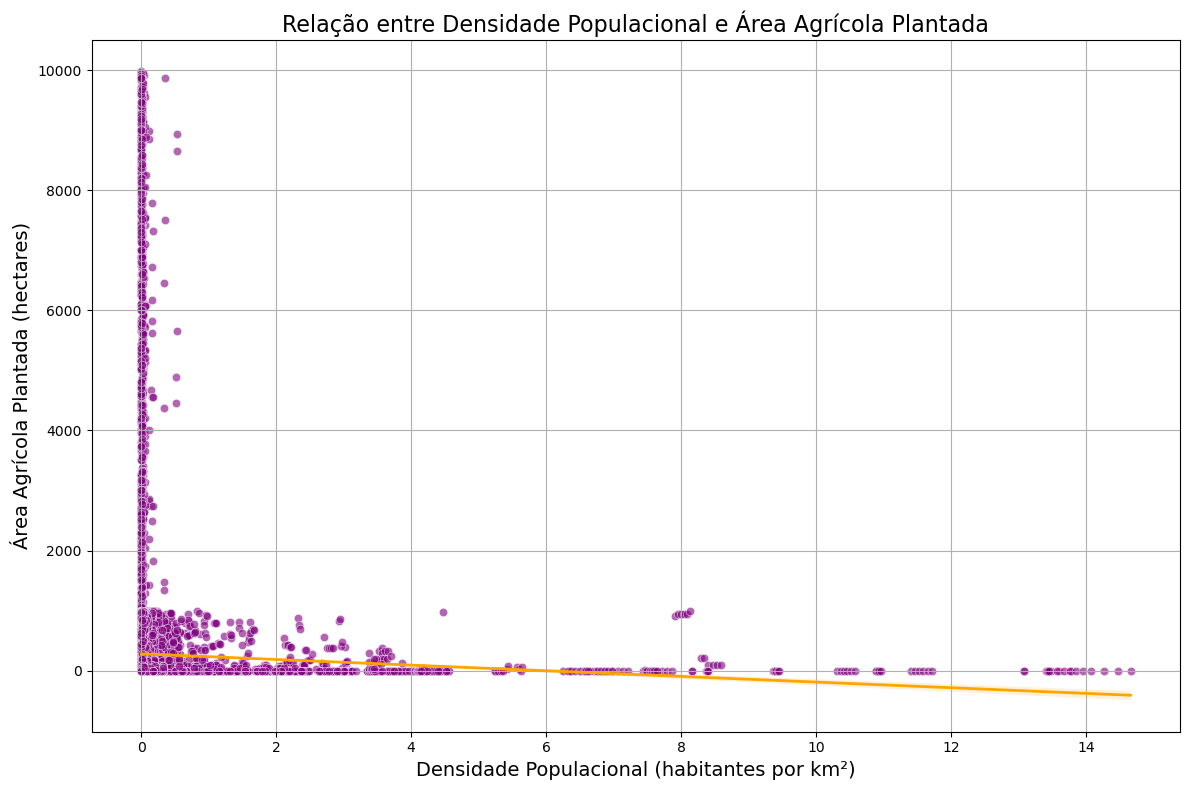

In [12]:
# Calcular a densidade populacional: População / Área total (em km²)
df['DensidadePopulacional'] = df['Populacao'] / df['Area']

# Plotar o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(x='DensidadePopulacional', y='AreaPlantada_h', data=df, color='purple', alpha=0.6)

# Adicionar uma linha de regressão para observar a tendência
sns.regplot(x='DensidadePopulacional', y='AreaPlantada_h', data=df, scatter=False, color='blue', line_kws={'linewidth': 2, 'color': 'orange'})

# Títulos e rótulos
plt.title('Relação entre Densidade Populacional e Área Agrícola Plantada', fontsize=16)
plt.xlabel('Densidade Populacional (habitantes por km²)', fontsize=14)
plt.ylabel('Área Agrícola Plantada (hectares)', fontsize=14)

# Adicionar grade para facilitar a leitura
plt.grid(True)

# Ajustar o layout para que o gráfico não fique cortado
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
#print(df.columns.tolist())# Filtrar os dados para os anos desejados 

['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado', 'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas', 'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$', 'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis', 'povoamento', 'UF', 'Municipio', 'Regiao']


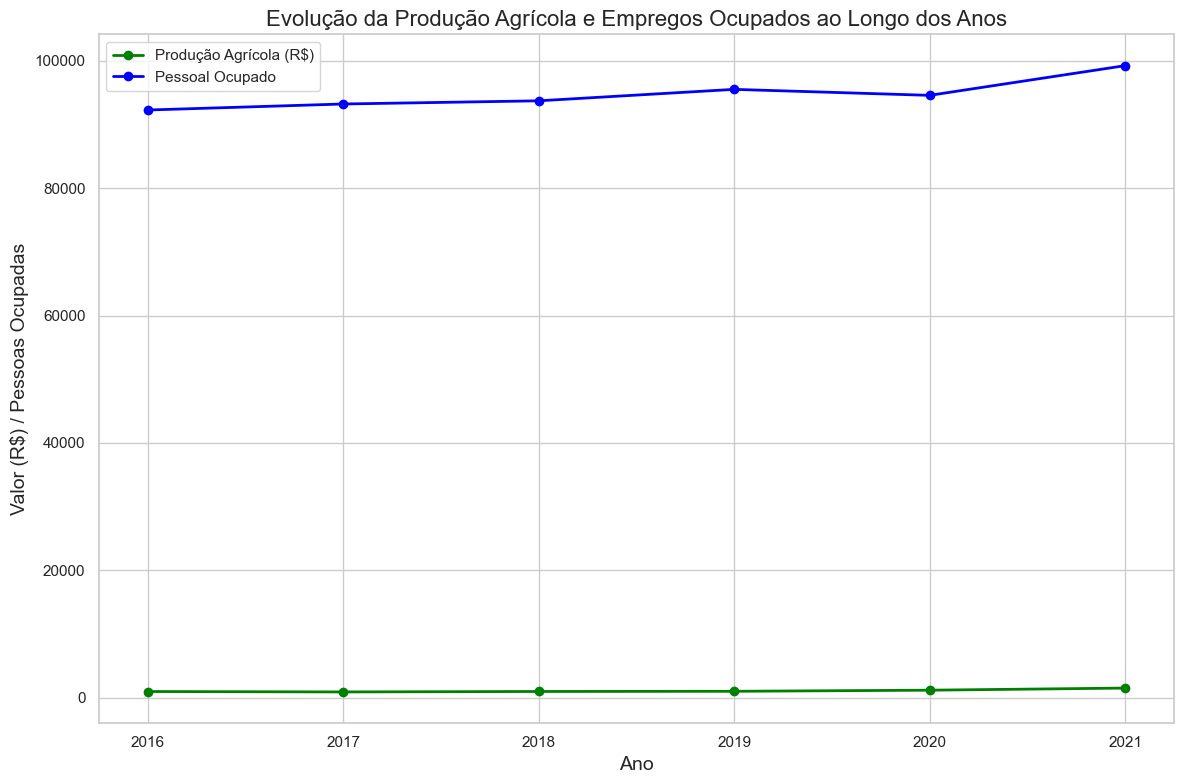

In [ ]:
   
# Garantir que as colunas são numéricas
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')

# Agrupar por ano e calcular a média para produção agrícola e pessoal ocupado
df_ano = df.groupby('Ano')[['VlProducaoAgricola', 'PessoalOcupado']].mean()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 8))
plt.plot(df_ano.index, df_ano['VlProducaoAgricola'], label='Produção Agrícola (R$)', color='green', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(df_ano.index, df_ano['PessoalOcupado'], label='Pessoal Ocupado', color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Adicionar título e rótulos
plt.title('Evolução da Produção Agrícola e Empregos Ocupados ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valor (R$) / Pessoas Ocupadas', fontsize=14)

# Adicionar a legenda
plt.legend()

# Adicionar grade para melhor visualização
plt.grid(True)

# Ajustar o layout para não cortar os labels
plt.tight_layout()

# Exibir o gráfico
plt.show()

7. PERGUNTA DE PESQUISA (Hipótese):

    Municípios com alta mecanização agrícola (grande área plantada) empregam menos pessoas na agropecuária, em média, do que municípios com baixa mecanização. Essa é uma hipótese que testa se há diferença significativa no emprego agrícola entre dois grupos de municípios:

    Com alta mecanização (grande área plantada).

    Com baixa mecanização (pequena área plantada).

TESTE DE HIPÓTESE

Teste t de Student para duas amostras independentes (assumindo variâncias diferentes):

    H₀ (hipótese nula): A média de empregos na agropecuária é igual nos dois grupos.

    H₁ (hipótese alternativa): A média de empregos na agropecuária é diferente entre os grupos.

In [22]:


# Converte para número
df["AreaPlantada_h"] = pd.to_numeric(df["AreaPlantada_h"].astype(str).str.replace(".", "").str.replace(",", "."), errors='coerce')
df["PessoalOcupado"] = pd.to_numeric(df["PessoalOcupado"].astype(str).str.replace(".", "").str.replace(",", "."), errors='coerce')

# Aqui você cola o trecho do teste de hipótese:
df_clean = df[['AreaPlantada_h', 'PessoalOcupado']].dropna()

mediana_area = df_clean['AreaPlantada_h'].median()

grupo_baixa = df_clean[df_clean['AreaPlantada_h'] <= mediana_area]['PessoalOcupado']
grupo_alta = df_clean[df_clean['AreaPlantada_h'] > mediana_area]['PessoalOcupado']

from scipy.stats import ttest_ind
t_stat, p_valor = ttest_ind(grupo_baixa, grupo_alta, equal_var=False)

print(f"T estatístico = {t_stat:.3f}")
print(f"P-valor = {p_valor:.3f}")

alpha = 0.05
if p_valor < alpha:
    print("Resultado: Rejeitamos H₀. Diferença significativa entre os grupos.")
else:
    print("Resultado: Não rejeitamos H₀. Diferença NÃO significativa entre os grupos.")

T estatístico = -2.190
P-valor = 0.029
Resultado: Rejeitamos H₀. Diferença significativa entre os grupos.


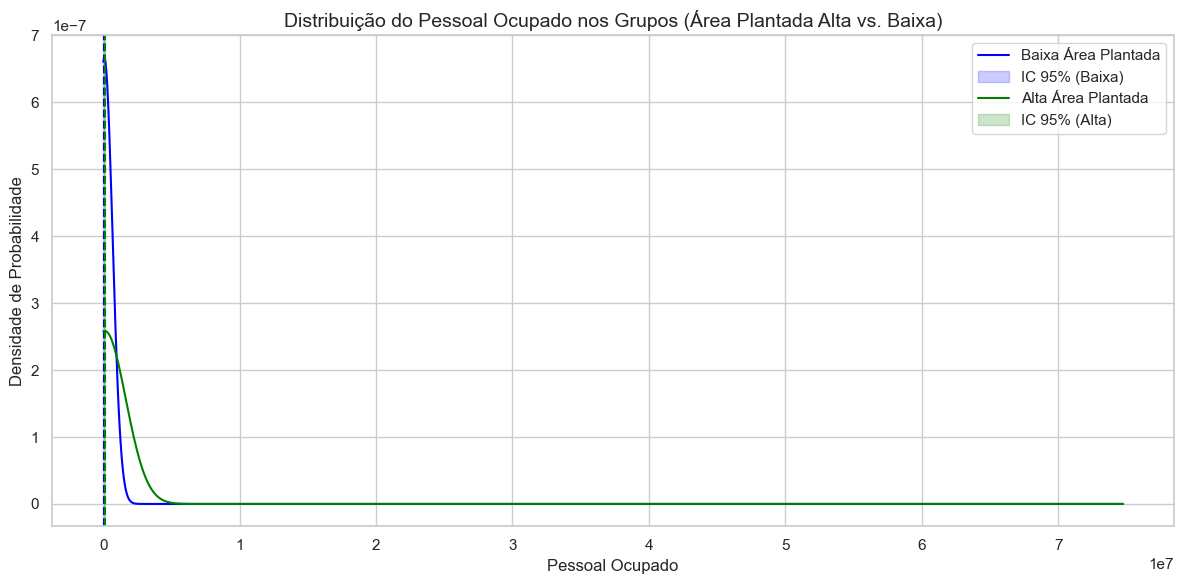

In [ ]:

# Configurar o estilo
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Calcular médias e desvios
media_baixa = grupo_baixa.mean()
std_baixa = grupo_baixa.std()
ic_baixa = 1.96 * std_baixa / np.sqrt(len(grupo_baixa))

media_alta = grupo_alta.mean()
std_alta = grupo_alta.std()
ic_alta = 1.96 * std_alta / np.sqrt(len(grupo_alta))

# Criar valores para plot da curva normal
x_vals = np.linspace(min(df_clean['PessoalOcupado']), max(df_clean['PessoalOcupado']), 1000)

# Plot curva normal grupo baixa
plt.plot(x_vals, norm.pdf(x_vals, media_baixa, std_baixa), color="blue", label="Baixa Área Plantada")
plt.axvline(media_baixa, color="blue", linestyle="--")
plt.axvspan(media_baixa - ic_baixa, media_baixa + ic_baixa, color='blue', alpha=0.2, label="IC 95% (Baixa)")

# Plot curva normal grupo alta
plt.plot(x_vals, norm.pdf(x_vals, media_alta, std_alta), color="green", label="Alta Área Plantada")
plt.axvline(media_alta, color="green", linestyle="--")
plt.axvspan(media_alta - ic_alta, media_alta + ic_alta, color='green', alpha=0.2, label="IC 95% (Alta)")

# Títulos e legenda
plt.title("Distribuição do Pessoal Ocupado nos Grupos (Área Plantada Alta vs. Baixa)", fontsize=14)
plt.xlabel("Pessoal Ocupado")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.tight_layout()
plt.show()

8. Municípios com maior produção agropecuária têm maior PIB?

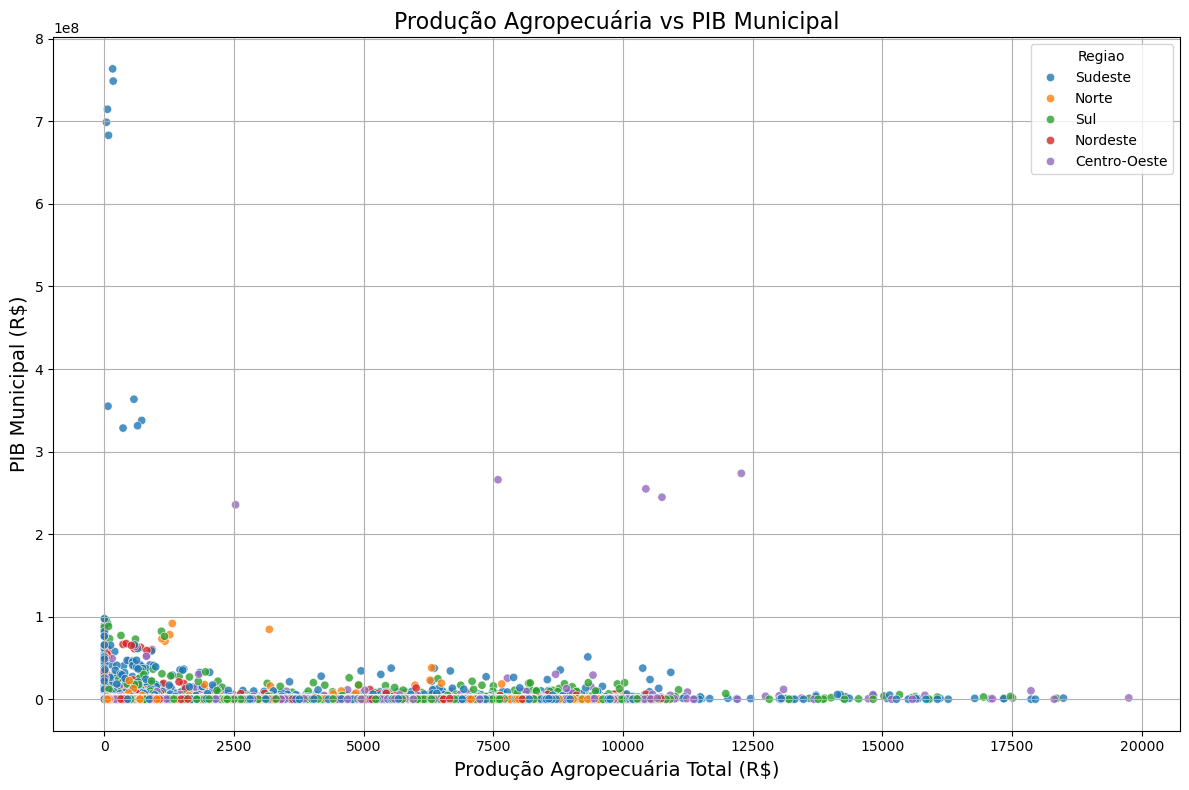

Correlação entre Produção Agropecuária Total e PIB Municipal: 0.02


In [6]:
# Criar a coluna de Produção Agropecuária Total
df['ProducaoAgropecuaria_Total'] = df['VlProducaoAgricola'] + df['VlProducaoPecuaria']

# Filtrar apenas as colunas necessárias, removendo possíveis NaNs
df_plot = df[['ProducaoAgropecuaria_Total', 'PIB', 'Municipio', 'Regiao']].dropna()

# Fazer o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='ProducaoAgropecuaria_Total', 
    y='PIB', 
    data=df_plot,
    hue='Regiao',  # colorir por região
    palette='tab10',
    alpha=0.8
)
plt.title('Produção Agropecuária vs PIB Municipal', fontsize=16)
plt.xlabel('Produção Agropecuária Total (R$)', fontsize=14)
plt.ylabel('PIB Municipal (R$)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular a correlação de Pearson
correlacao = df_plot['ProducaoAgropecuaria_Total'].corr(df_plot['PIB'])
print(f'Correlação entre Produção Agropecuária Total e PIB Municipal: {correlacao:.2f}')